### Import Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from sklearn.metrics import accuracy_score, classification_report
print(tf.__version__)

2.3.0


### Load Fashion Mnist Data

In [2]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Preview First Image

Image Label:  9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

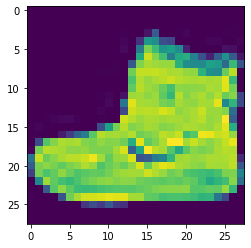

In [3]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print("Image Label: ", training_labels[0])
print(training_images[0])

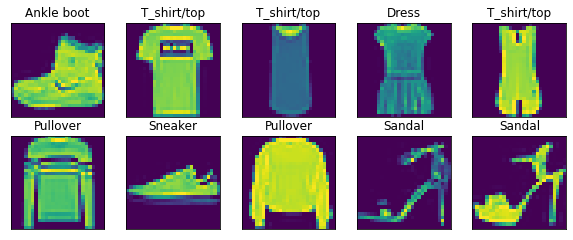

In [4]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i].reshape((28,28)))
    label_index = int(training_labels[i])
    plt.title(class_names[label_index])
plt.show()

### Reshape Image and Normalise the pixel values

In [5]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
training_images  = training_images / 255.0
test_images = test_images / 255.0

### Define The Model

In [13]:
model = tf.keras.models.Sequential()

In [14]:
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [17]:
history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=2, batch_size=256)

Epoch 1/20
235/235 - 2s - loss: 0.6108 - accuracy: 0.7852 - val_loss: 0.4196 - val_accuracy: 0.8514
Epoch 2/20
235/235 - 2s - loss: 0.3727 - accuracy: 0.8668 - val_loss: 0.3606 - val_accuracy: 0.8720
Epoch 3/20
235/235 - 2s - loss: 0.3264 - accuracy: 0.8822 - val_loss: 0.3394 - val_accuracy: 0.8768
Epoch 4/20
235/235 - 2s - loss: 0.2972 - accuracy: 0.8917 - val_loss: 0.3154 - val_accuracy: 0.8906
Epoch 5/20
235/235 - 2s - loss: 0.2733 - accuracy: 0.9005 - val_loss: 0.3098 - val_accuracy: 0.8910
Epoch 6/20
235/235 - 2s - loss: 0.2550 - accuracy: 0.9070 - val_loss: 0.2850 - val_accuracy: 0.8993
Epoch 7/20
235/235 - 2s - loss: 0.2411 - accuracy: 0.9118 - val_loss: 0.3093 - val_accuracy: 0.8849
Epoch 8/20
235/235 - 2s - loss: 0.2246 - accuracy: 0.9180 - val_loss: 0.2715 - val_accuracy: 0.8991
Epoch 9/20
235/235 - 2s - loss: 0.2111 - accuracy: 0.9221 - val_loss: 0.2707 - val_accuracy: 0.9011
Epoch 10/20
235/235 - 2s - loss: 0.2013 - accuracy: 0.9258 - val_loss: 0.2510 - val_accuracy: 0.9086

In [19]:
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(train_accuracy))

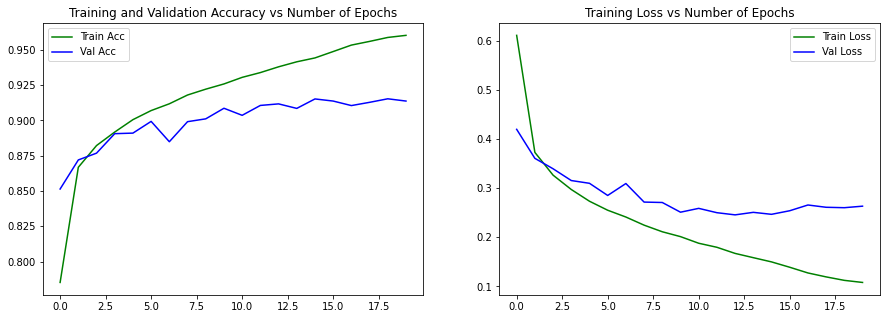

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, "green", label="Train Acc")
plt.plot(epochs, val_accuracy, "blue", label="Val Acc")
plt.title("Training and Validation Accuracy vs Number of Epochs")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, "green", label="Train Loss")
plt.plot(epochs, val_loss, "blue", label="Val Loss")
plt.title("Training Loss vs Number of Epochs")
plt.legend()
plt.show()

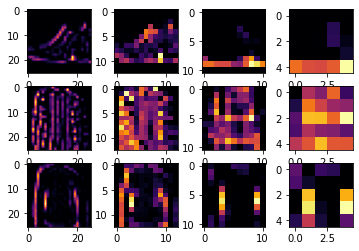

In [21]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [24]:
predicted_labels = model.predict_classes(test_images)
print("Accuracy : {}".format(accuracy_score(test_labels, predicted_labels)))

Accuracy : 0.9137


In [23]:
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.84      0.88      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.89      0.85      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.72      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



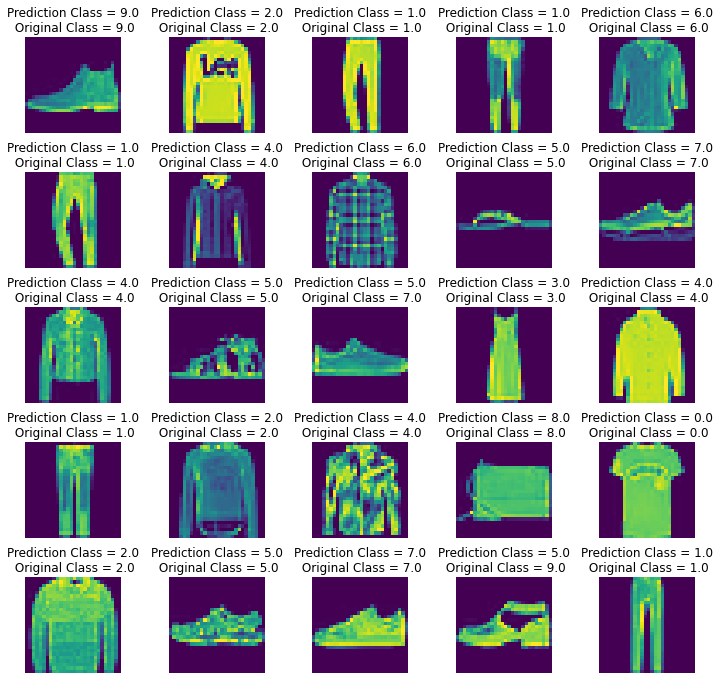

In [25]:
fig, axes = plt.subplots(5, 5, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, 5 * 5):  
    axes[i].imshow(test_images[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_labels[i]:0.1f}\n Original Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)